# Progression of selfplay games
Move number and final score

In [1]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

In [2]:
indices = []
moves = []
scores = []
i = 0
while True:
    try:
        x = np.load(str(i).zfill(5)+'.npz')
        indices.append(i)
        moves.append(len(x['moves']))
        scores.append(x['score'])
        i += 1
    except FileNotFoundError:
        print('Got {} games'.format(i))
        break

Got 21 games


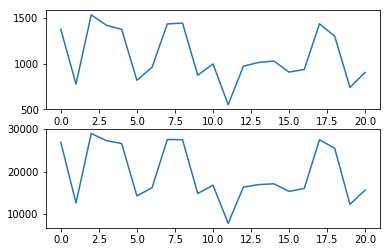

In [4]:
plt.subplot(211)
plt.plot(indices, moves)
plt.subplot(212)
plt.plot(indices, scores)
plt.show()

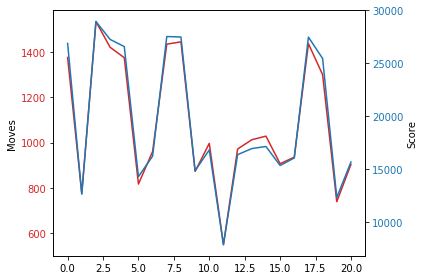

In [15]:
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.plot(indices, moves, color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_ylabel('Moves')

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
color = 'tab:blue'
ax2.plot(indices, scores, color=color)
ax2.tick_params(axis='y', labelcolor=color)
ax2.set_ylabel('Score')

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

In [9]:
stats.bartlett(moves[:10], moves[10:])

BartlettResult(statistic=0.5121777337568321, pvalue=0.4741976484230953)

No clear trends as of yet.
* 0-9: Fixed order
* 10-19: 1st ConvNet

# Move distribution

In [10]:
moves10 = []
for i in range(0, 10):
    x = np.load(str(i).zfill(5)+'.npz')
    moves10.extend(x['moves'])
moves20 = []
for i in range(10, 20):
    x = np.load(str(i).zfill(5)+'.npz')
    moves20.extend(x['moves'])

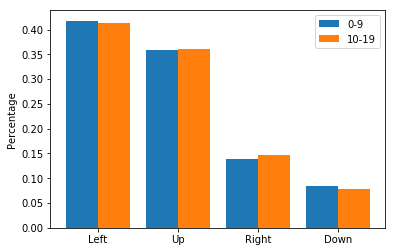

In [11]:
plt.hist([moves10, moves20], np.arange(5)-0.5, density=True)
plt.xticks(np.arange(4), ['Left', 'Up', 'Right', 'Down'])
plt.legend(['0-9', '10-19'])
plt.ylabel('Percentage')
plt.show()